# 0_量子回路の基本

## 参照元
* https://qiskit.org/documentation/locale/ja_JP/intro_tutorial1.html

### 注意点
* QuantumCircuit(num-of-Qubit, num-of-Classicalbit)
* 測定を行う場合は対応する古典ビットに射影するため２つ目の引数が必要

### ブロッホ球の詳細
* https://qiita.com/ttabata/items/0e839d03963d656551e0

# 量子回路の作成と可視化

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

/usr/local/lib/python3.6/dist-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)



Total count for 00 and 11 are: {'11': 481, '00': 519}


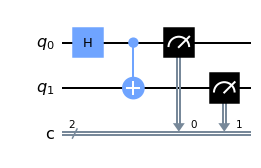

In [2]:
# 回路の可視化
circuit.draw('mpl')

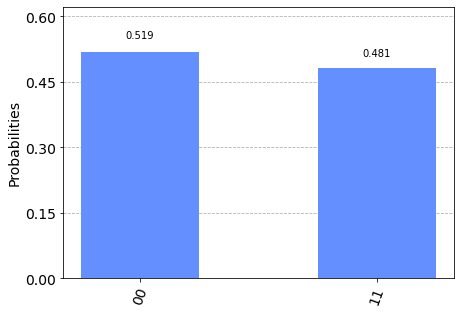

In [28]:
# 測定結果の可視化
plot_histogram(counts)

# 量子ビットの初期化
* デフォルトで量子ビットは0に初期化される
* 1に初期化するには以下のような手順が必要

In [4]:
initial_state = [0, 1]

qc = QuantumCircuit(1) # qcを再定義する必要があります。
qc.initialize(initial_state, 0) # `initial_state`状態の0番目の量子ビットを初期化します。

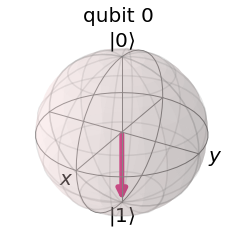

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

# 基本的な量子ゲートの動作確認

## パウリXゲート
* |0>と|1>を相互に交換する
* 古典ゲート的にはNOT変換に相当

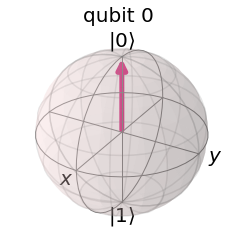

In [6]:
# 初期状態が0の場合
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

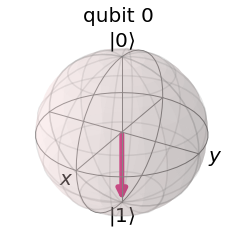

In [7]:
qc.x(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

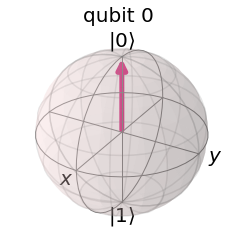

In [8]:
qc.x(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

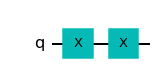

In [9]:
qc.draw('mpl')

In [10]:
# 初期状態が1の場合
initial_state = [0, 1]
backend = Aer.get_backend('statevector_simulator')

qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0) 

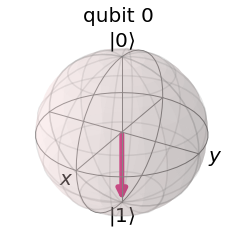

In [11]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

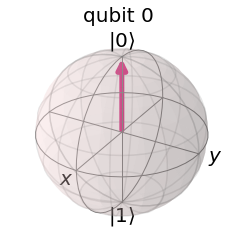

In [12]:
qc.x(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## パウリYゲート
* ブロッホ球のy軸を中心にpi回転

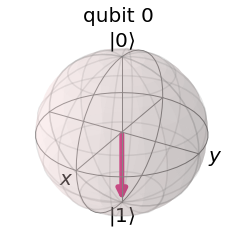

In [13]:
# 初期状態が0の場合
qc = QuantumCircuit(1)
qc.y(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

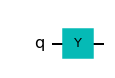

In [14]:
qc.draw('mpl')

## パウリZゲート
* ブロッホ球のz軸を中心にpi回転

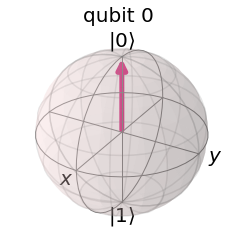

In [15]:
# 初期状態が0の場合
qc = QuantumCircuit(1)
qc.z(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## アダマールゲート
* ブロッホベクトル [1,0,1]（x軸とz軸の間の線）を中心とする回転
* またはXとZの基底間の量子ビットの状態の変換

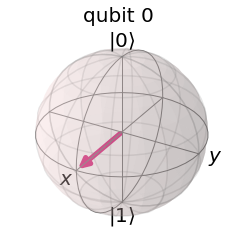

In [16]:
qc = QuantumCircuit(1)
qc.h(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

# Rϕゲート
* z軸を中心にφ回転
* Hゲート適用後でないとブロッホ球では差分を確認できない
* Rφゲートの特殊な場合として、Iゲート、Sゲート、Tゲートが存在する

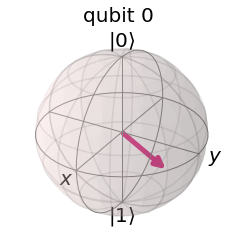

In [17]:
from math import pi

qc = QuantumCircuit(1)
qc.h(0)
qc.rz(pi/3, 0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

# Iゲート
* 恒等演算
* Xゲートの2回繰り返しと等価

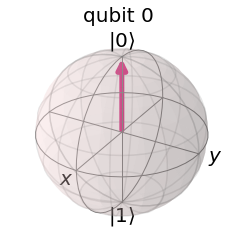

In [18]:
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

qc.x(0)
qc.x(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

# Sゲート
* z軸を中心にpi/2回転
* sdgゲートは-pi/2回転の逆変換

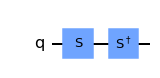

In [22]:
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

qc.s(0)
qc.sdg(0)

qc.draw('mpl')

# Tゲート
* z軸を中心にpi/4回転
* sdgゲートは-pi/4回転の逆変換

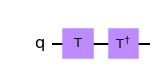

In [25]:
qc = QuantumCircuit(1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

qc.t(0)
qc.tdg(0)

qc.draw('mpl')

# C-NOTゲート
* 制御ビットと標的ビットの2量子ビットからなる量子ゲート
* 制御ビットが |1⟩のとき標的ビットにXゲートを適用
* 古典ゲートではNOTゲートに対応

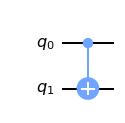

In [26]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw('mpl')

# トフォリゲート
* 3量子ビットからなる量子ゲート
* 2つの制御ビットがともに|1>の時に限って標的ビットを反転させるゲート

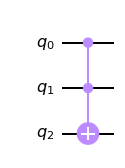

In [27]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# 制御ビットa、b、標的ビットtのトフォリ
qc.ccx(a,b,t)
qc.draw('mpl')